Logistic Regression Accuracy: 0.967741935483871
Decision Tree Accuracy: 0.9516129032258065
Random Forest Accuracy: 0.967741935483871


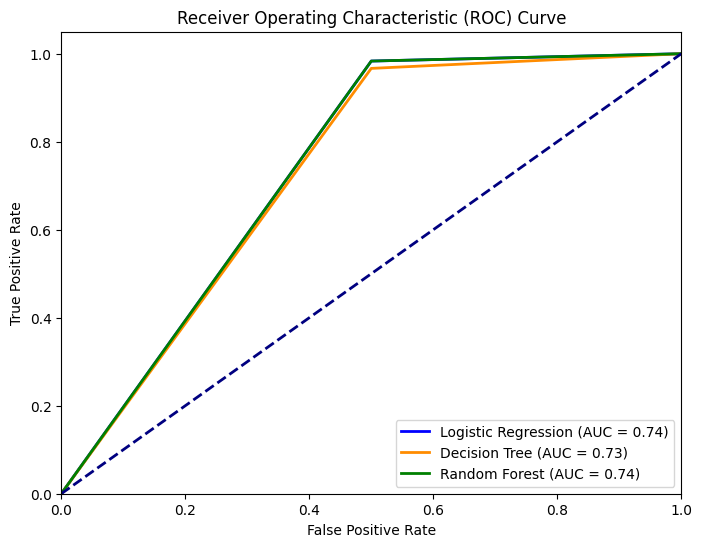

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
data = pd.read_csv("./lungDisease.csv")

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['GENDER', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                       'CHRONIC_DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
                       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                       'SWALLOWING DIFFICULTY', 'CHEST PAIN']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Encode target variable (LUNG_CANCER) to binary values
data['LUNG_CANCER'] = label_encoder.fit_transform(data['LUNG_CANCER'])

# Split the data into features (X) and target variable (y)
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Logistic Regression classifier
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Make predictions on the test set for Logistic Regression
y_pred_logistic_regression = logistic_regression.predict(X_test)

# Calculate accuracy for Logistic Regression
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
print("Logistic Regression Accuracy:", accuracy_logistic_regression)

# Calculate ROC curve and AUC score for Logistic Regression
fpr_logistic_regression, tpr_logistic_regression, _ = roc_curve(y_test, y_pred_logistic_regression)
roc_auc_logistic_regression = auc(fpr_logistic_regression, tpr_logistic_regression)

# Train a Decision Tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Make predictions on the test set for Decision Tree
y_pred_decision_tree = decision_tree.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree Accuracy:", accuracy_decision_tree)

# Calculate ROC curve and AUC score for Decision Tree
fpr_decision_tree, tpr_decision_tree, _ = roc_curve(y_test, y_pred_decision_tree)
roc_auc_decision_tree = auc(fpr_decision_tree, tpr_decision_tree)

# Train a Random Forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Make predictions on the test set for Random Forest
y_pred_random_forest = random_forest.predict(X_test)

# Calculate accuracy for Random Forest
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Random Forest Accuracy:", accuracy_random_forest)

# Calculate ROC curve and AUC score for Random Forest
fpr_random_forest, tpr_random_forest, _ = roc_curve(y_test, y_pred_random_forest)
roc_auc_random_forest = auc(fpr_random_forest, tpr_random_forest)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic_regression, tpr_logistic_regression, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logistic_regression:.2f})')
plt.plot(fpr_decision_tree, tpr_decision_tree, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc_decision_tree:.2f})')
plt.plot(fpr_random_forest, tpr_random_forest, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_random_forest:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

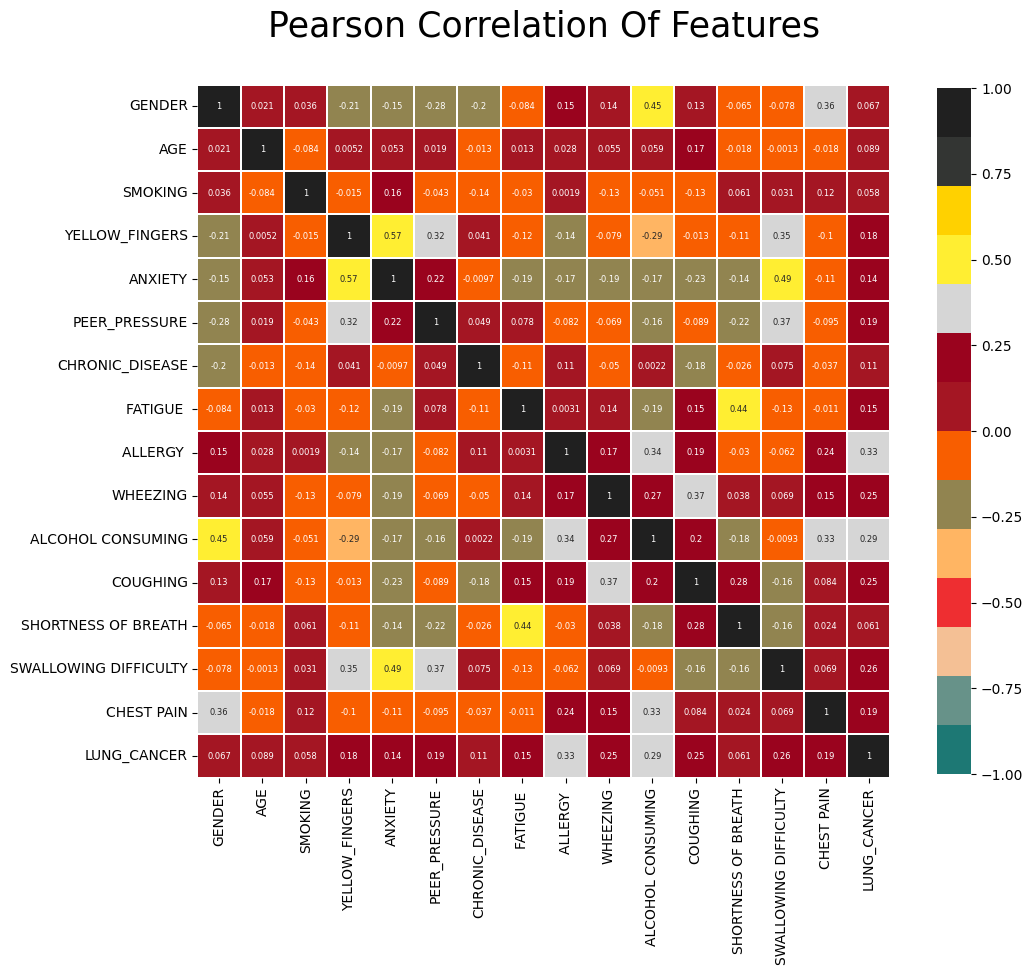

In [8]:
#Plot a relationship graph between feature
palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]
plt.subplots(figsize =(12, 9))
p=sns.heatmap(data.corr(), cmap = palette, square=True, cbar_kws=dict(shrink =.99),
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =6))
p.axes.set_title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

In [9]:
#Dataset After LabelEncode the selected categorical columns converted to numerical Values
data.head().style.set_properties(**{"background-color": "#FF6969","color":"white","border": "1.5px  solid black"})

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0
